In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [ ]:
from google.colab import files

# Prompt user to upload a folder
uploaded = files.upload()

Saving labels2.pkl to labels2.pkl


In [ ]:
import pickle

# Load labels
with open('labels2.pkl', 'rb') as f:
    labels = pickle.load(f)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical representations
labels = label_encoder.fit_transform(labels)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load data from Google Drive
file_path = '/content/drive/My Drive/data2.pkl'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

Mounted at /content/drive


Constant definition for the training set images

In [ ]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

N_CLASSES = 51

print('Image variables initialisation')

Image variables initialisation


# Data processing



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

# convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# convert to categorical
Y_train = utils.to_categorical(y_train, N_CLASSES)
Y_test = utils.to_categorical(y_test, N_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Visualisation of two sample RGB-D images**

Here we will visualise two sample images from the dataset.

Sample input image: [[[0.7372549  0.7372549  0.7411765 ]
  [0.7372549  0.73333335 0.7411765 ]
  [0.74509805 0.7294118  0.7411765 ]
  ...
  [0.6627451  0.6901961  0.7176471 ]
  [0.67058825 0.69411767 0.7254902 ]
  [0.6745098  0.6901961  0.7254902 ]]

 [[0.7372549  0.73333335 0.7411765 ]
  [0.73333335 0.7294118  0.74509805]
  [0.7372549  0.7294118  0.7411765 ]
  ...
  [0.6627451  0.68235296 0.7137255 ]
  [0.6627451  0.6784314  0.7176471 ]
  [0.6666667  0.6862745  0.7137255 ]]

 [[0.7372549  0.7294118  0.7411765 ]
  [0.73333335 0.7294118  0.74509805]
  [0.73333335 0.73333335 0.7411765 ]
  ...
  [0.654902   0.6745098  0.7176471 ]
  [0.654902   0.6784314  0.7137255 ]
  [0.65882355 0.68235296 0.7176471 ]]

 ...

 [[0.7294118  0.7176471  0.7294118 ]
  [0.7294118  0.7137255  0.7254902 ]
  [0.7254902  0.7137255  0.72156864]
  ...
  [0.7137255  0.7058824  0.72156864]
  [0.7058824  0.70980394 0.7176471 ]
  [0.7058824  0.70980394 0.72156864]]

 [[0.7372549  0.7137255  0.7254902 ]
  [0.73333335 0.7

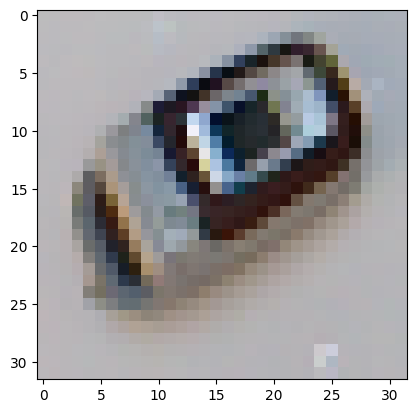

Sample input image: [[[0.43529412 0.50980395 0.5882353 ]
  [0.4392157  0.5137255  0.5921569 ]
  [0.4392157  0.50980395 0.5921569 ]
  ...
  [0.43529412 0.49803922 0.5803922 ]
  [0.43529412 0.5019608  0.5803922 ]
  [0.42745098 0.5019608  0.58431375]]

 [[0.43529412 0.5058824  0.5921569 ]
  [0.43529412 0.5058824  0.5921569 ]
  [0.43529412 0.5019608  0.58431375]
  ...
  [0.4392157  0.49411765 0.58431375]
  [0.44313726 0.49803922 0.58431375]
  [0.43529412 0.49411765 0.5882353 ]]

 [[0.44313726 0.5019608  0.5882353 ]
  [0.44313726 0.5019608  0.5921569 ]
  [0.44705883 0.5058824  0.5921569 ]
  ...
  [0.4392157  0.49019608 0.5803922 ]
  [0.43529412 0.49019608 0.5803922 ]
  [0.43529412 0.49019608 0.58431375]]

 ...

 [[0.34117648 0.41960785 0.5254902 ]
  [0.3372549  0.41960785 0.5176471 ]
  [0.3254902  0.4117647  0.50980395]
  ...
  [0.36078432 0.42745098 0.5176471 ]
  [0.36078432 0.43137255 0.5137255 ]
  [0.36078432 0.43529412 0.5254902 ]]

 [[0.34117648 0.42352942 0.5294118 ]
  [0.3372549  0.4

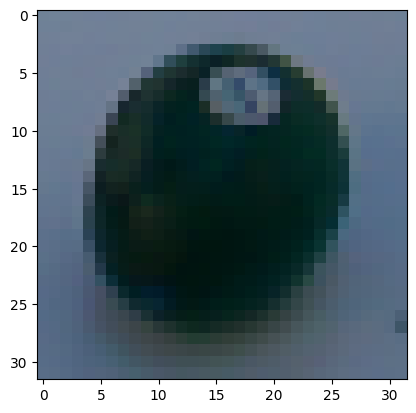

In [ ]:
Selected_Image = 2
image = X_test[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

Selected_Image = 4
image = X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

### CNN

In [ ]:
#training constants
BATCH_SIZE = 32
N_EPOCH = 20
N_CLASSES = 51
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

print('Main variables initialised.')

Main variables initialised.


In [ ]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


**Model compilation**

This compiles the CNN model, and then shows its summary.


In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                        

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [ ]:
# training/fitting of the model

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/20
4159/4159 [==============================] - 21s 5ms/step - loss: 0.0727 - accuracy: 0.9781 - val_loss: 0.0217 - val_accuracy: 0.9974
Epoch 2/20
4159/4159 [==============================] - 19s 5ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.0168 - val_accuracy: 0.9984
Epoch 3/20
4159/4159 [==============================] - 17s 4ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 4/20
4159/4159 [==============================] - 17s 4ms/step - loss: 0.0230 - accuracy: 0.9941 - val_loss: 0.0130 - val_accuracy: 0.9995
Epoch 5/20
4159/4159 [==============================] - 17s 4ms/step - loss: 0.0199 - accuracy: 0.9945 - val_loss: 0.0147 - val_accuracy: 0.9992
Epoch 6/20
4159/4159 [==============================] - 17s 4ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.0135 - val_accuracy: 0.9996
Epoch 7/20
4159/4159 [==============================] - 17s 4ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.0144 - val_ac

In [ ]:
# Save the history
with open('historydrop5-cnn.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
#batch size model history
with open('history32-cnn.pkl', 'rb') as f:
    history32_cnn = pickle.load(f)
with open('history64-cnn.pkl', 'rb') as f:
    history64_cnn = pickle.load(f)
with open('history128-cnn.pkl', 'rb') as f:
    history128_cnn = pickle.load(f)

In [ ]:
#optimizers model history
with open('historySGD-cnn.pkl', 'rb') as f:
    historySGD_cnn = pickle.load(f)
with open('historyAdam-cnn.pkl', 'rb') as f:
    historyAdam_cnn = pickle.load(f)
with open('historyRMSProp-cnn.pkl', 'rb') as f:
    historyRMSProp_cnn = pickle.load(f)

In [ ]:
#learning rate model history
with open('historyAdam-cnn.pkl', 'rb') as f:
    history0001_cnn = pickle.load(f)
with open('history001-cnn.pkl', 'rb') as f:
    history001_cnn = pickle.load(f)
with open('history01-cnn.pkl', 'rb') as f:
    history01_cnn = pickle.load(f)

In [ ]:
#learning rate model history
with open('historydrop1-cnn.pkl', 'rb') as f:
    historydrop1_cnn = pickle.load(f)
with open('historydrop2-cnn.pkl', 'rb') as f:
    historydrop2_cnn = pickle.load(f)
with open('historydrop3-cnn.pkl', 'rb') as f:
    historydrop3_cnn = pickle.load(f)
with open('historydrop4-cnn.pkl', 'rb') as f:
    historydrop4_cnn = pickle.load(f)
with open('historydrop5-cnn.pkl', 'rb') as f:
    historydrop5_cnn = pickle.load(f)

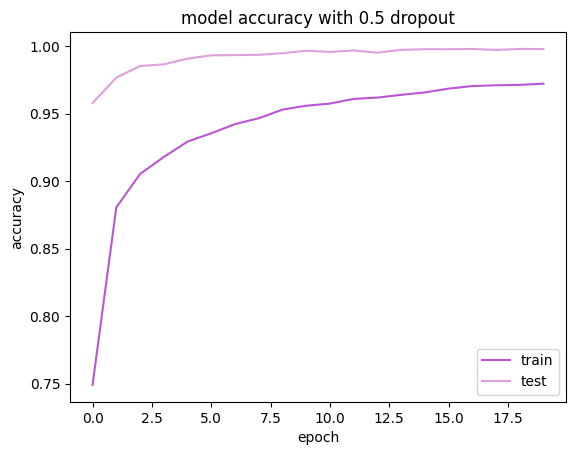

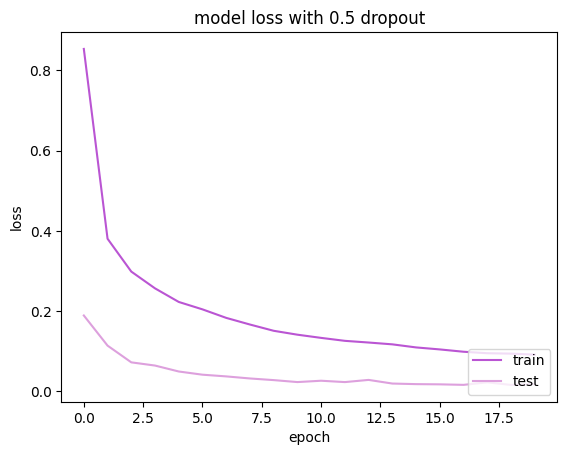

In [ ]:

# summarize history for accuracy
#plt.plot(mo)
'''plt.plot(historydrop1_cnn['accuracy'], color = "#4169E1")
plt.plot(historydrop1_cnn['val_accuracy'], color = "#87CEFA")
plt.plot(historydrop2_cnn['accuracy'], color = "#2E8B57")
plt.plot(historydrop2_cnn['val_accuracy'], color = "#90EE90")
plt.plot(historydrop3_cnn['accuracy'], color = "#DC143C")
plt.plot(historydrop3_cnn['val_accuracy'], color = "#F08080")
plt.plot(historydrop4_cnn['accuracy'], color = "#C0C0C0")
plt.plot(historydrop4_cnn['val_accuracy'], color = "#696969")'''
plt.plot(historydrop5_cnn['accuracy'], color = "#BA55D3")
plt.plot(historydrop5_cnn['val_accuracy'], color = "#DDA0DD")
plt.title('model accuracy with 0.5 dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
'''plt.plot(historydrop1_cnn['loss'], color = "#4169E1")
plt.plot(historydrop1_cnn['val_loss'], color = "#87CEFA")
plt.plot(historydrop2_cnn['loss'], color = "#2E8B57")
plt.plot(historydrop2_cnn['val_loss'], color = "#90EE90")
plt.plot(historydrop3_cnn['loss'], color = "#DC143C")
plt.plot(historydrop3_cnn['val_loss'], color = "#F08080")
plt.plot(historydrop4_cnn['loss'], color = "#C0C0C0")
plt.plot(historydrop4_cnn['val_loss'], color = "#696969")'''
plt.plot(historydrop5_cnn['loss'], color = "#BA55D3")
plt.plot(historydrop5_cnn['val_loss'], color = "#DDA0DD")
plt.title('model loss with 0.5 dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

325/325 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 0.9997

Test score/loss: 0.0064733270555734634
Test accuracy: 0.9997114539146423
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


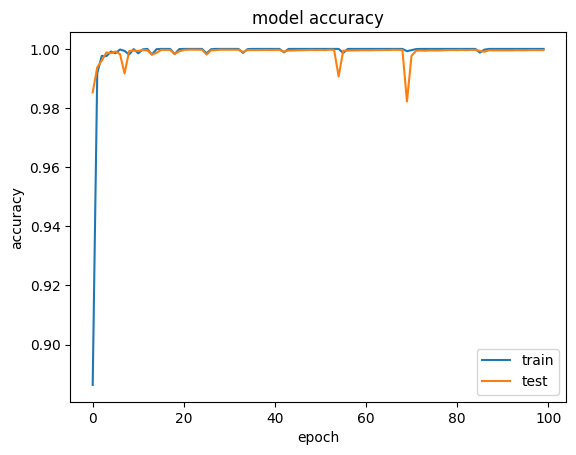

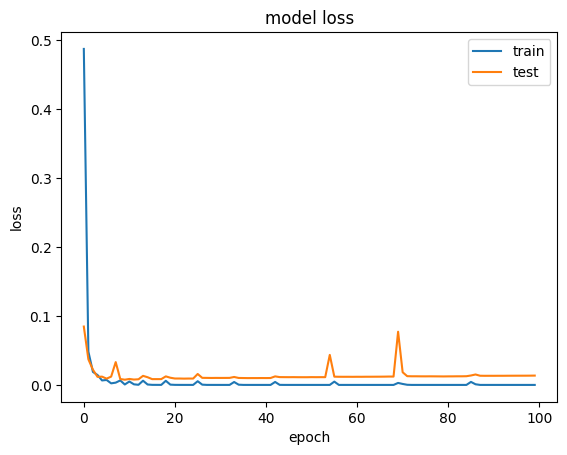

In [ ]:
#Testing
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augumenting
print("Augmenting training set images...")

datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [ ]:
#fit the dataset
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE), steps_per_epoch=X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/20


<ipython-input-13-2c0203e11110>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE), steps_per_epoch=X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


5198/5198 [==============================] - 108s 20ms/step - loss: 1.3514 - accuracy: 0.5904
Epoch 2/20
5198/5198 [==============================] - 103s 20ms/step - loss: 0.7893 - accuracy: 0.7470
Epoch 3/20
5198/5198 [==============================] - 105s 20ms/step - loss: 0.6526 - accuracy: 0.7894
Epoch 4/20
5198/5198 [==============================] - 105s 20ms/step - loss: 0.5847 - accuracy: 0.8122
Epoch 5/20
5198/5198 [==============================] - 103s 20ms/step - loss: 0.5405 - accuracy: 0.8265
Epoch 6/20
5198/5198 [==============================] - 104s 20ms/step - loss: 0.5092 - accuracy: 0.8377
Epoch 7/20
5198/5198 [==============================] - 101s 19ms/step - loss: 0.4870 - accuracy: 0.8447
Epoch 8/20
5198/5198 [==============================] - 113s 22ms/step - loss: 0.4633 - accuracy: 0.8519
Epoch 9/20
5198/5198 [==============================] - 109s 21ms/step - loss: 0.4532 - accuracy: 0.8574
Epoch 10/20
5198/5198 [==============================] - 107s 21ms

1300/1300 [==============================] - 4s 3ms/step - loss: 0.1337 - accuracy: 0.9623

Test score/loss: 0.1337168663740158
Test accuracy: 0.962269127368927
dict_keys(['loss', 'accuracy'])


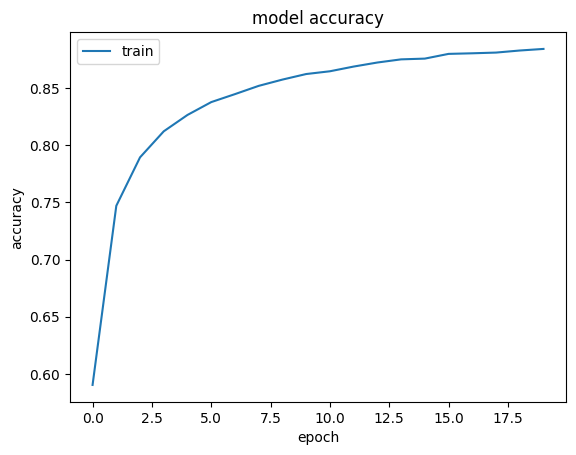

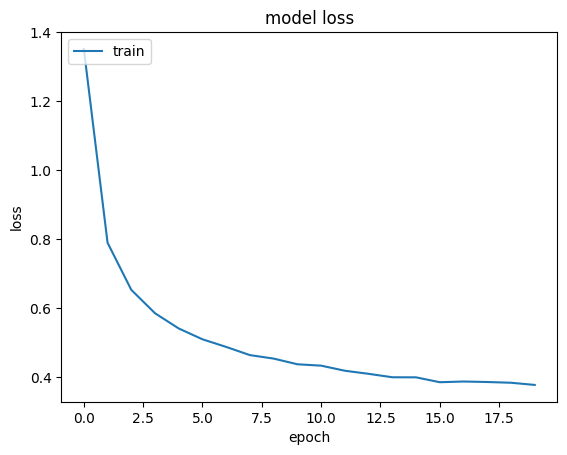

In [ ]:
#Testing
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### MLP

In [ ]:
reshaped_X_train = X_train.reshape(166336, 3072)
reshaped_X_test = X_test.reshape(41584, 3072)
reshaped_X_train = reshaped_X_train.astype('float32')
reshaped_X_test = reshaped_X_test.astype('float32')

# normalisation of the pixel values from 0-255 range to 0-1 range
reshaped_X_train /= 255
reshaped_X_test /= 255

print ("Input data ready")

Input data ready


In [ ]:
# import the dropout layer type
from tensorflow.keras.layers import Dropout

N_EPOCH = 20
N_HIDDEN = 128
RESHAPED = 3072
BATCH_SIZE = 32
VERBOSE = 1
VALIDATION_SPLIT = 0.2

# Probability of weights dropout
P_DROPOUT = 0.5

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(P_DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(P_DROPOUT))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# model compilation
model.summary()

# model compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 51)               

In [ ]:
#train the network
history = model.fit(reshaped_X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
4159/4159 [==============================] - 17s 4ms/step - loss: 3.2261 - accuracy: 0.1252 - val_loss: 3.0879 - val_accuracy: 0.1048
Epoch 2/20
4159/4159 [==============================] - 15s 4ms/step - loss: 2.9928 - accuracy: 0.1651 - val_loss: 3.0917 - val_accuracy: 0.1458
Epoch 3/20
4159/4159 [==============================] - 18s 4ms/step - loss: 2.9427 - accuracy: 0.1758 - val_loss: 3.0697 - val_accuracy: 0.1219
Epoch 4/20
4159/4159 [==============================] - 15s 4ms/step - loss: 2.9173 - accuracy: 0.1802 - val_loss: 3.2115 - val_accuracy: 0.0996
Epoch 5/20
4159/4159 [==============================] - 15s 3ms/step - loss: 2.9017 - accuracy: 0.1851 - val_loss: 3.2118 - val_accuracy: 0.1061
Epoch 6/20
4159/4159 [==============================] - 15s 4ms/step - loss: 2.8915 - accuracy: 0.1855 - val_loss: 3.2368 - val_accuracy: 0.0962
Epoch 7/20
4159/4159 [==============================] - 15s 4ms/step - loss: 2.9364 - accuracy: 0.1784 - val_loss: 3.1872 - val_ac

In [ ]:
# Save the history
with open('historydrop5.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
#batch size model history
with open('history32.pkl', 'rb') as f:
    history32 = pickle.load(f)
with open('history64.pkl', 'rb') as f:
    history64 = pickle.load(f)
with open('history128.pkl', 'rb') as f:
    history128 = pickle.load(f)

In [ ]:
#batch size model history
with open('historySGD.pkl', 'rb') as f:
    historySGD = pickle.load(f)
with open('historyAdam.pkl', 'rb') as f:
    historyAdam = pickle.load(f)
with open('historyRMSProp.pkl', 'rb') as f:
    historyRMSProp = pickle.load(f)

In [ ]:
#learning rate model history
with open('historyAdam.pkl', 'rb') as f:
    history0001 = pickle.load(f)
with open('history001.pkl', 'rb') as f:
    history001 = pickle.load(f)
with open('history01.pkl', 'rb') as f:
    history01 = pickle.load(f)

In [ ]:
#learning rate model history
with open('historydrop1.pkl', 'rb') as f:
    historydrop1 = pickle.load(f)
with open('historydrop2.pkl', 'rb') as f:
    historydrop2 = pickle.load(f)
with open('historydrop3.pkl', 'rb') as f:
    historydrop3 = pickle.load(f)
with open('historydrop4.pkl', 'rb') as f:
    historydrop4 = pickle.load(f)
with open('historydrop5.pkl', 'rb') as f:
    historydrop5 = pickle.load(f)

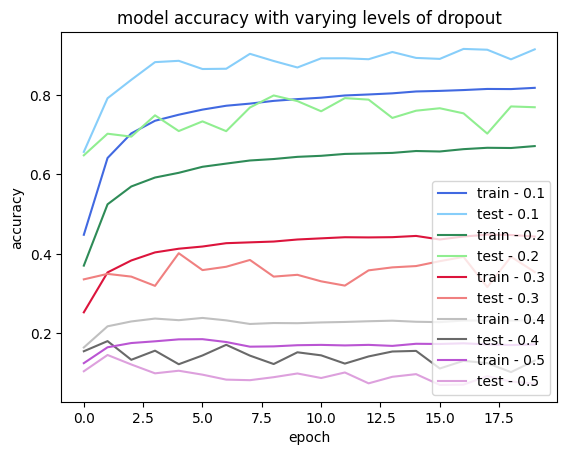

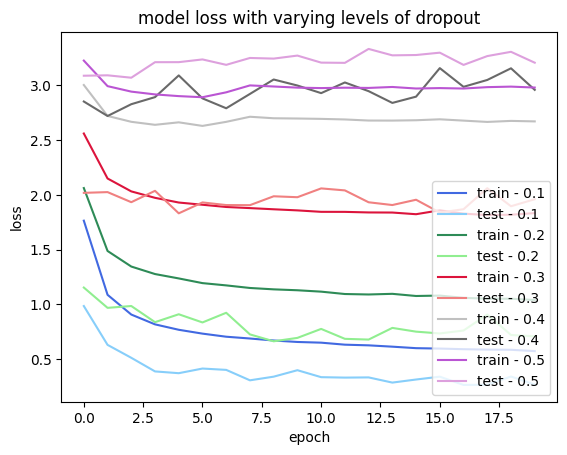

In [ ]:
# summarize history for accuracy
#plt.plot(mo)
plt.plot(historydrop1['accuracy'], color = "#4169E1")
plt.plot(historydrop1['val_accuracy'], color = "#87CEFA")
plt.plot(historydrop2['accuracy'], color = "#2E8B57")
plt.plot(historydrop2['val_accuracy'], color = "#90EE90")
plt.plot(historydrop3['accuracy'], color = "#DC143C")
plt.plot(historydrop3['val_accuracy'], color = "#F08080")
plt.plot(historydrop4['accuracy'], color = "#C0C0C0")
plt.plot(historydrop4['val_accuracy'], color = "#696969")
plt.plot(historydrop5['accuracy'], color = "#BA55D3")
plt.plot(historydrop5['val_accuracy'], color = "#DDA0DD")
plt.title('model accuracy with varying levels of dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train - 0.1', 'test - 0.1', 'train - 0.2', 'test - 0.2', 'train - 0.3', 'test - 0.3', 'train - 0.4', 'test - 0.4', 'train - 0.5', 'test - 0.5',], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(historydrop1['loss'], color = "#4169E1")
plt.plot(historydrop1['val_loss'], color = "#87CEFA")
plt.plot(historydrop2['loss'], color = "#2E8B57")
plt.plot(historydrop2['val_loss'], color = "#90EE90")
plt.plot(historydrop3['loss'], color = "#DC143C")
plt.plot(historydrop3['val_loss'], color = "#F08080")
plt.plot(historydrop4['loss'], color = "#C0C0C0")
plt.plot(historydrop4['val_loss'], color = "#696969")
plt.plot(historydrop5['loss'], color = "#BA55D3")
plt.plot(historydrop5['val_loss'], color = "#DDA0DD")
plt.title('model loss with varying levels of dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train - 0.1', 'test - 0.1', 'train - 0.2', 'test - 0.2', 'train - 0.3', 'test - 0.3', 'train - 0.4', 'test - 0.4', 'train - 0.5', 'test - 0.5',], loc='lower right')
plt.show()

### Transformer

In [11]:
# Common
import keras
import numpy as np
import tensorflow as tf
from tensorflow import image as tfi

# Data
from keras.datasets import cifar100

# Data Viz
import matplotlib.pyplot as plt

# Data Aug
from keras.layers import Normalization
from keras.layers import Resizing
from keras.layers import RandomFlip
from keras.layers import RandomRotation
from keras.layers import RandomZoom


# Model
from tensorflow.nn import gelu
from keras.models import Model
from keras.layers import Dense
from keras.layers import Layer
from keras.layers import Input
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import MultiHeadAttention
from keras.layers import LayerNormalization
from keras.layers import Add
from keras.layers import Flatten

# Compiling
from keras.losses import SparseCategoricalCrossentropy as SCCe
from tensorflow_addons.optimizers import AdamW
from keras.metrics import SparseCategoricalAccuracy as Acc
from keras.metrics import SparseTopKCategoricalAccuracy as KAcc

# Callbacks
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [26]:
SIZE = 72
PATCH_SIZE = 6
LR = 0.001
WEIGHT_DECAY = 0.0001
EPOCHS = 10
NUM_PATCHES = (SIZE // PATCH_SIZE) ** 2
PROJECTION_DIMS = 64
NUM_HEADS = 4
HIDDEN_UNITS = [PROJECTION_DIMS*2, PROJECTION_DIMS]
OUTPUT_UNITS = [2048,1024]

In [13]:
class DataAugmentation(Layer):
    def __init__(self, norm, SIZE):
        super(DataAugmentation, self).__init__()
        self.norm = norm
        self.SIZE = SIZE
        self.resize = Resizing(SIZE, SIZE)
        self.flip = RandomFlip('horizontal')
        self.rotation = RandomRotation(factor=0.02)
        self.zoom = RandomZoom(height_factor=0.2, width_factor=0.2)
    def call(self, X):
        x = self.norm(X)
        x = self.resize(x)
        x = self.flip(x)
        x = self.rotation(x)
        x = self.zoom(x)
        return x

    def get_config(self):
        config = super().get_config()
        config.update({
        "norm": self.norm,
        "SIZE": self.SIZE,
        })
        return config

In [14]:
class Patches(Layer):

    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0] # Get the Batch Size
        patches = tfi.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1], # only along the Height and Width Dimension
            strides=[1, self.patch_size, self.patch_size, 1], # The next patch should not overlap the previus patch
            rates=[1,1,1,1],
            padding='VALID'
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    def get_config(self):
        config = super().get_config()
        config.update({
            "path-size": self.patch_size,
        })
        return config

In [15]:
def show_image(image, title=None, cmap=None):
    plt.imshow(image, cmap=cmap)
    if title is not None:
        plt.title(title)
    plt.axis('off')

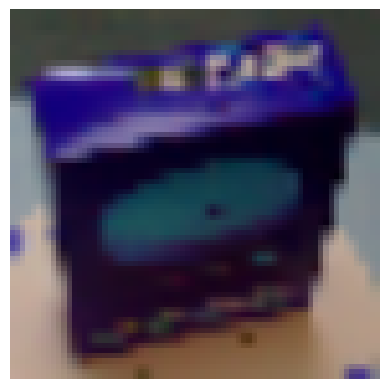

In [16]:
image = X_train[np.random.randint(len(X_train))]
image = tfi.resize(image, (SIZE, SIZE))
#image = tf.cast(image,'uint8')
show_image(image)
image = tf.expand_dims(image,0)

In [17]:
patch = Patches(PATCH_SIZE) # patch Size
patches = patch(image)

In [18]:
patches.shape # We needed 12 patches

TensorShape([1, 144, 108])

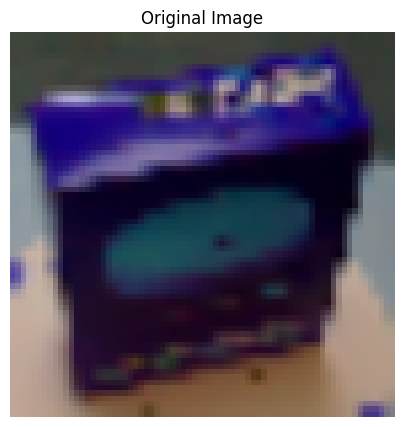

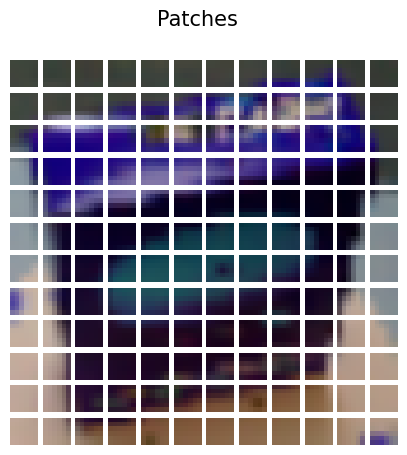

In [19]:
plt.figure(figsize=(5,5))
show_image(image[0], title="Original Image")
plt.show()

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(5,5))
plt.suptitle("Patches", fontsize=15)
for i in range(patches.shape[-2]):
    plt.subplot(n,n,i+1)
    patch = tf.reshape(patches[0][i],(PATCH_SIZE, PATCH_SIZE, 3))
    #patch = tf.cast(patch, 'uint8')
    show_image(patch, cmap='gray')
plt.show()

In [20]:
class PatchEncoder(Layer):

    def __init__(self, num_patches, projection_dims): # Projection dims is  D
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.d = projection_dims

        self.dense = Dense(units=projection_dims)
        self.positional_embeddings = Embedding(input_dim=num_patches, output_dim=projection_dims)

    def call(self, X):
        positions = tf.range(0,limit=self.num_patches, delta=1)
        encoded = self.dense(X) + self.positional_embeddings(positions)
        return encoded
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_paches": self.num_patches,
            "d": self.d,
        })
        return config

In [21]:
class MLP(Layer):
    def __init__(self, units, rate):
        super(MLP, self).__init__()
        self.units = units
        self.rate = rate
        self.layers = [[Dense(unit, activation=gelu), Dropout(rate)] for unit in units]

    def call(self, x):
        for layers in self.layers:
          for layer in layers:
            x = layer(x)
        return x

    def get_config(self):
        config = super().get_config()
        config.update({
            "units": self.units,
            "rate": self.rate,
        })
        return config

In [22]:
class Transformer(Layer):

    def __init__(self, L, num_heads, key_dims, hidden_units):
        super(Transformer, self).__init__()
        self.L = L
        self.heads = num_heads
        self.key_dims = key_dims
        self.hidden_units = hidden_units

        self.norm = LayerNormalization(epsilon=1e-6) # Remember the Params
        self.MHA = MultiHeadAttention(num_heads=num_heads, key_dim=key_dims, dropout=0.1)
        self.net = MLP(units=hidden_units, rate=0.1)
        self.add= Add()

    def call(self, X):
        inputs = X
        x = X
        for _ in range(self.L):
          x = self.norm(x)
          x = self.MHA(x,x) # our Target and the Source element are the same
          y = self.add([x,inputs])
          x = self.norm(y)
          x = self.net(x)
          x = self.add([x,y])
        return x

    def get_config(self):
        config = super().get_config()
        config.update({
            "L": self.L,
            "heads": self.heads,
            "key_dims":self.key_dims,
            "hidden_units":self.hidden_units
        })
        return config

In [23]:
input_shape = X_train.shape[1:]

In [24]:
# Input Layer
inputs = Input(shape=input_shape)

# Apply Data Aug
norm = Normalization()
norm.adapt(X_train)

x = DataAugmentation(norm, SIZE)(inputs)

# Get Patches
x = Patches(PATCH_SIZE)(x)

# PatchEncoding Network
x = PatchEncoder(NUM_PATCHES, PROJECTION_DIMS)(x)

# Transformer Network
x = Transformer(8, NUM_HEADS, PROJECTION_DIMS, HIDDEN_UNITS)(x)

# Output Network
x = LayerNormalization(epsilon=1e-6)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

x = MLP(OUTPUT_UNITS, rate=0.5)(x)

# Ouput Layer
outputs = Dense(100)(x)

In [28]:
with tf.device('/GPU:0'):
  # Model
  model = Model(
    inputs=[inputs],
    outputs=[outputs],
  )

  # Compiling
  model.compile(
      loss=SCCe(from_logits=True),
      optimizer=AdamW(learning_rate=LR, weight_decay=WEIGHT_DECAY),
      metrics=[
          Acc(name="Accuracy"),
          KAcc(5, name="Top-5-Accuracy")
      ]
  )

  # Callbacks
  cbs = [
    ModelCheckpoint("ViT-Model.h5", save_best_only=True),
    EarlyStopping(patience=5, monitor='val_Accuracy', mode='max' ,restore_best_weights=True)
  ]

  # Fit
  history = model.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_split=VALIDATION_SPLIT,
      callbacks=cbs
  )

Epoch 1/10
4159/4159 [==============================] - ETA: 0s - loss: 0.4342 - Accuracy: 0.8683 - Top-5-Accuracy: 0.9908

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4159/4159 [==============================] - 304s 69ms/step - loss: 0.4342 - Accuracy: 0.8683 - Top-5-Accuracy: 0.9908 - val_loss: 0.0574 - val_Accuracy: 0.9802 - val_Top-5-Accuracy: 0.9997
Epoch 2/10
4159/4159 [==============================] - 282s 68ms/step - loss: 0.1899 - Accuracy: 0.9417 - Top-5-Accuracy: 0.9982 - val_loss: 0.0306 - val_Accuracy: 0.9897 - val_Top-5-Accuracy: 0.9999
Epoch 3/10
4159/4159 [==============================] - 283s 68ms/step - loss: 0.1526 - Accuracy: 0.9532 - Top-5-Accuracy: 0.9990 - val_loss: 0.0310 - val_Accuracy: 0.9907 - val_Top-5-Accuracy: 0.9999
Epoch 4/10
4159/4159 [==============================] - 285s 68ms/step - loss: 0.1379 - Accuracy: 0.9592 - Top-5-Accuracy: 0.9991 - val_loss: 0.0306 - val_Accuracy: 0.9919 - val_Top-5-Accuracy: 0.9999
Epoch 5/10
4159/4159 [==============================] - 304s 73ms/step - loss: 0.1298 - Accuracy: 0.9622 - Top-5-Accuracy: 0.9991 - val_loss: 0.0228 - val_Accuracy: 0.9920 - val_Top-5-Accuracy: 0.9999
Epoch 

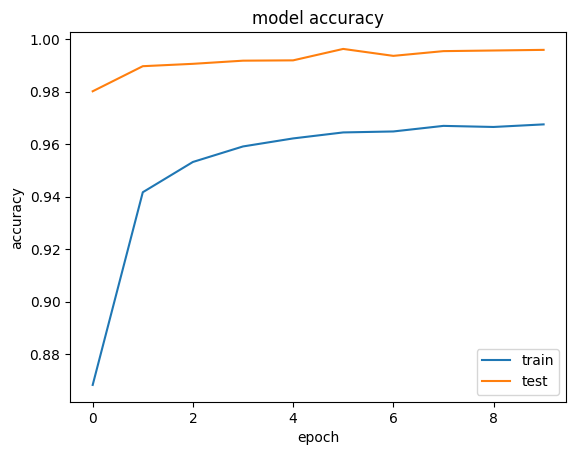

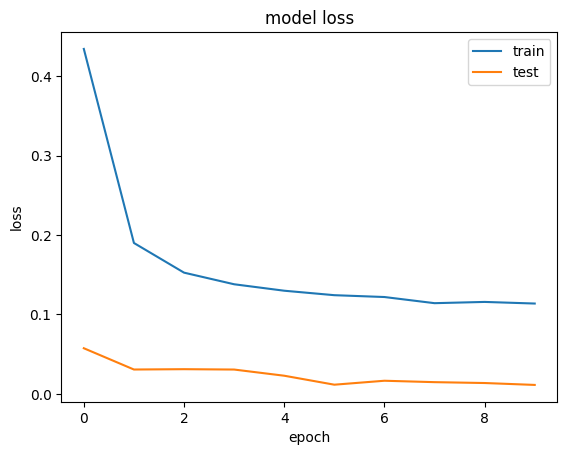

In [34]:
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history['Accuracy'])
plt.plot(history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()